<a href="https://colab.research.google.com/github/chinmaykumar06/SHALA-2020/blob/master/Assignment_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
# Loading the basic packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **DATA EXPLORATION**

In [0]:
attrition_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,0,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0,1023
1024,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6,1024
1025,24,0,Travel_Rarely,1476,Sales,4,1,Medical,1,1445,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3,1025
1026,32,0,Travel_Rarely,601,Sales,7,5,Marketing,1,1446,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3,1026


In [0]:
# Data exploration

attrition_data.shape

(1028, 34)

In [0]:
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ID'],
      dtype='object')

In [0]:
attrition_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


In [0]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [0]:
# check whether thier is null value are present or not
attrition_data["Attrition"].isna().sum()

0

In [0]:
# Finding the number of distinct classes
attrition_data.Attrition.value_counts()

0    856
1    172
Name: Attrition, dtype: int64

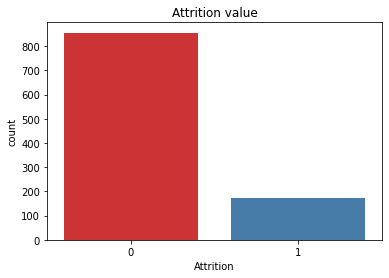

In [0]:
# Data visualization

sns.countplot(attrition_data['Attrition'], palette='Set1',color='blue')
plt.title("Attrition value")
plt.show()

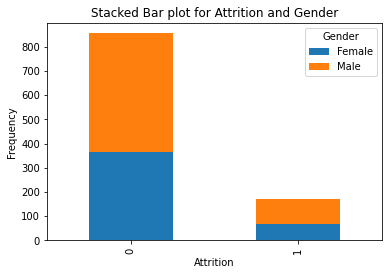

In [0]:
newcrosstab_gender = pd.crosstab(attrition_data.Attrition,attrition_data.Gender)
newcrosstab_gender.plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Stacked Bar plot for Attrition and Gender')
plt.show()

In [0]:
newcrosstab_gender

Gender,Female,Male
Attrition,,
0,364,492
1,67,105


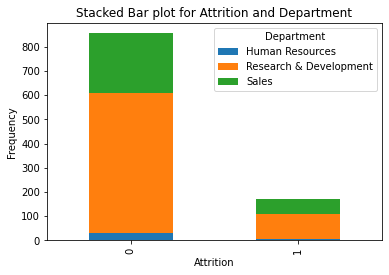

In [0]:
newcrosstab_department = pd.crosstab(attrition_data.Attrition,attrition_data.Department)
newcrosstab_department.plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Stacked Bar plot for Attrition and Department')
plt.show()

In [0]:
newcrosstab_department

Department,Human Resources,Research & Development,Sales
Attrition,,,
0,31,579,246
1,5,104,63


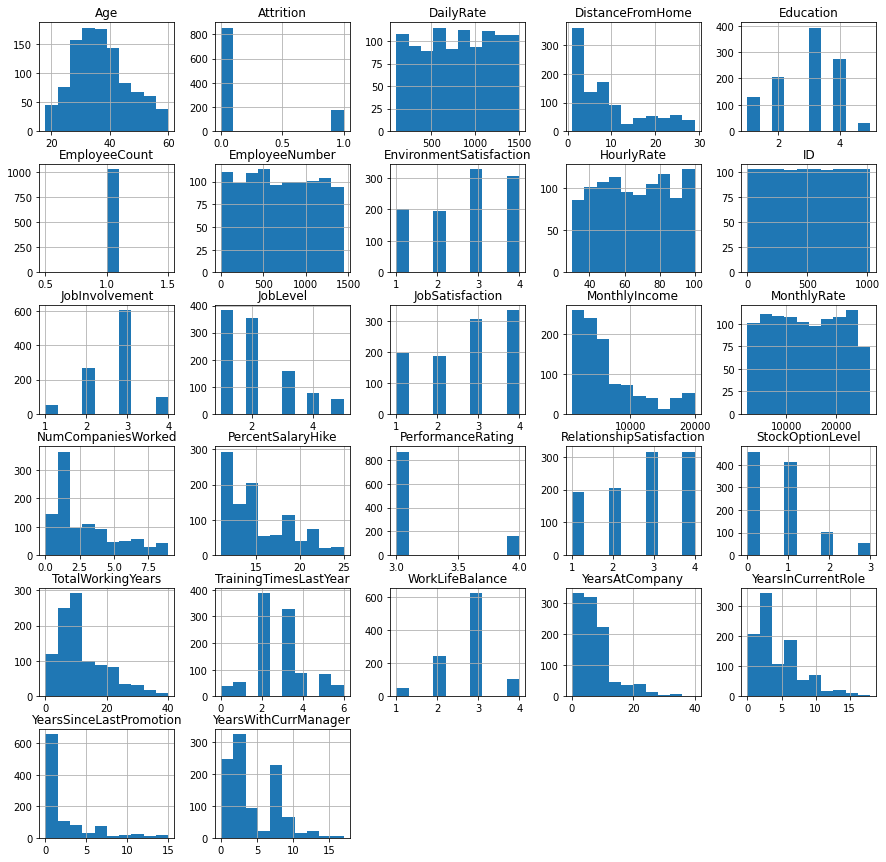

In [0]:
attrition_data.hist(figsize=(15,15))
plt.show()

In [0]:
x = attrition_data.corr()
x

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
Age,1.000000,-0.168641,0.010270,-0.022883,0.181464,NaN,0.003173,0.033375,0.006313,0.042037,0.512325,-0.021383,0.503340,0.016969,0.313343,-0.025688,-0.037771,0.061905,0.006998,0.691968,-0.002472,-0.028193,0.317744,0.209906,0.215766,0.194178,0.002749
Attrition,-0.168641,1.000000,-0.050566,0.086875,-0.041021,NaN,0.026833,-0.119202,-0.018472,-0.158768,-0.169121,-0.097518,-0.163709,0.025739,0.037174,0.008138,0.005300,-0.050263,-0.160597,-0.178842,-0.038728,-0.064322,-0.133021,-0.159691,-0.031826,-0.151208,0.026794
DailyRate,0.010270,-0.050566,1.000000,0.023364,-0.049667,NaN,-0.072425,0.018301,0.025172,0.057859,0.009149,0.032010,0.015948,-0.042087,0.026531,0.031686,0.024503,-0.023635,0.042857,0.028833,0.004617,-0.066313,-0.042520,0.005374,-0.041213,-0.037282,-0.072765
DistanceFromHome,-0.022883,0.086875,0.023364,1.000000,0.012416,NaN,0.008191,-0.022668,0.056265,0.058609,-0.030509,0.002253,-0.048151,0.026314,-0.021968,0.041837,0.034268,0.005861,0.043912,-0.025257,-0.007631,-0.053905,-0.029847,-0.004379,-0.008735,-0.004795,0.008636
Education,0.181464,-0.041021,-0.049667,0.012416,1.000000,NaN,-0.002240,0.006558,0.022398,0.028283,0.098366,0.003848,0.098867,-0.049857,0.133409,-0.018768,-0.039675,0.014048,-0.003790,0.133525,-0.036168,0.011091,0.061348,0.075898,0.072333,0.086565,-0.001705
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.003173,0.026833,-0.072425,0.008191,-0.002240,NaN,1.000000,0.029648,0.024285,-0.003322,0.031621,-0.043556,0.041926,0.010285,0.003580,-0.056774,-0.057206,-0.093246,0.024540,0.018827,-0.007704,0.028360,0.012112,0.000836,0.005375,-0.010186,0.999796
EnvironmentSatisfaction,0.033375,-0.119202,0.018301,-0.022668,0.006558,NaN,0.029648,1.000000,-0.066821,0.014838,0.014005,0.017982,-0.000771,0.019339,0.000308,-0.063798,-0.044733,-0.011526,0.020861,0.008940,-0.036634,0.018968,0.000121,0.025088,0.023509,-0.003313,0.028744
HourlyRate,0.006313,-0.018472,0.025172,0.056265,0.022398,NaN,0.024285,-0.066821,1.000000,0.045250,-0.013305,-0.072199,-0.004524,-0.026535,0.023740,-0.007174,-0.009990,-0.016492,0.020385,-0.010346,-0.014123,0.002916,-0.018412,-0.033051,-0.042768,-0.030232,0.022999
JobInvolvement,0.042037,-0.158768,0.057859,0.058609,0.028283,NaN,-0.003322,0.014838,0.045250,1.000000,-0.007549,-0.037395,-0.006137,-0.011343,0.010136,-0.022957,-0.014805,0.061255,0.043739,-0.005842,-0.030435,-0.022140,-0.009283,0.011350,-0.021055,0.038344,-0.003512


Note :

Here we can see that correlation values between any two attribute is greater > `0.5` consider as _**positive correlation**_
and < `0.5` consider as _**negative correlation**_ , we can see that values in heatmap with `orange` color

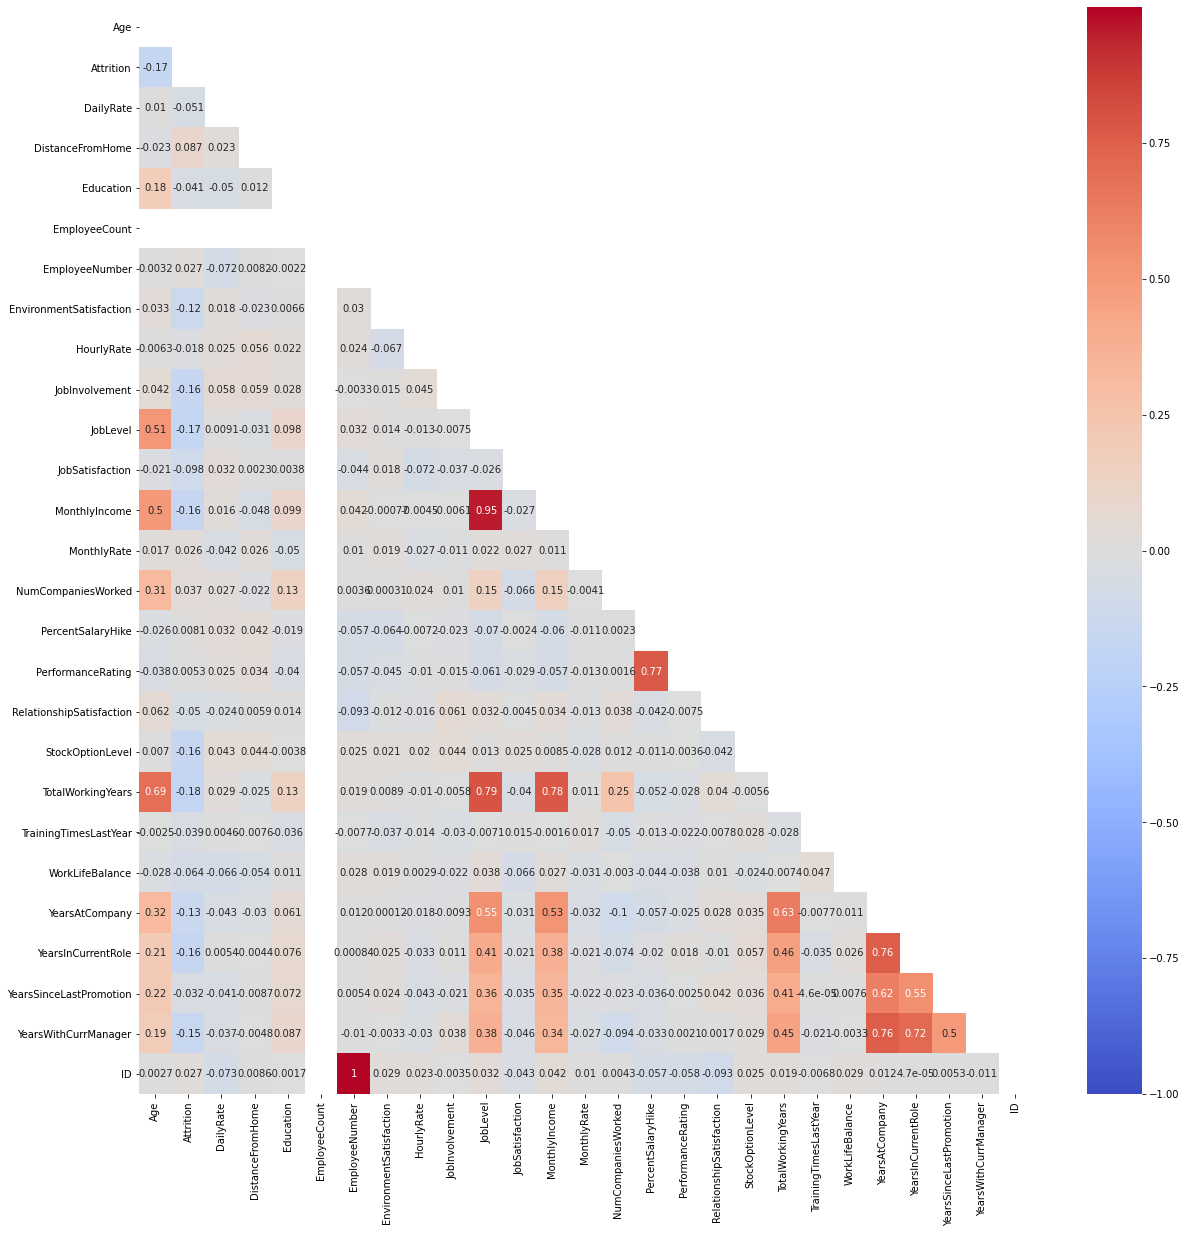

In [0]:
## Visulizing heat map
plt.figure(figsize=(20,20))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(  attrition_data.corr(),
              vmin=-1,
              cmap="coolwarm",
              annot=True,
              mask=mask
            )
plt.show()

We can also visualize the data using `pair plot` which is similar as `heatmap` , using pairplot we can visualize correlation between the 2 attributes more cleared .

As attribute are more , so visualization is not clear 
refer : [Data-Visualization](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed)

In [0]:
#attrition_pair_plot = attrition_data.dropna()
#sns.pairplot(attrition_pair_plot,height=1.5)
#plt.show()

# **DATA CLEANING**

In [0]:
attrition_data['Gender'] = attrition_data['Gender'].map(dict(zip(['Male','Female'],[0,1])))
attrition_data['OverTime'] = attrition_data['OverTime'].map(dict(zip(['No','Yes'],[0,1])))
attrition_new = pd.get_dummies(attrition_data, columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])
attrition_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [0]:
norm_pending = attrition_new[["DailyRate", "MonthlyIncome", "MonthlyRate"]]
normalized_DR =(norm_pending['DailyRate']/norm_pending['DailyRate'].max()) *10
normalized_MI =(norm_pending['MonthlyIncome']/norm_pending['MonthlyIncome'].max()) *10
normalized_MR =(norm_pending['MonthlyRate']/norm_pending['MonthlyRate'].max()) *10

In [0]:
attrition_new = attrition_new.drop(['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'EmployeeNumber', 'EmployeeCount', 'ID'], axis=1)
attrition_new['Norm_DR'] = normalized_DR
attrition_new['Norm_MI'] = normalized_MI 
attrition_new['Norm_MR'] = normalized_MR
attrition_new.head() 

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Norm_DR,Norm_MI,Norm_MR
0,41,1,1,2,2,1,94,3,2,4,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,7.351568,2.996650,7.214712
1,49,0,8,1,3,0,61,2,2,2,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.861241,2.565128,9.225156
2,37,1,2,2,4,0,92,2,1,3,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,9.159440,1.045052,0.887440
3,33,0,3,4,4,1,56,3,1,3,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,9.286191,1.454573,8.577725
4,27,0,2,1,1,0,40,3,1,2,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3.942628,1.734087,6.160228


In [0]:
X = attrition_new.drop(['Attrition'], axis = 1)
y = attrition_new['Attrition']

In [0]:
# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics

# Machine learning model : **RandomForestClassifier** 

In [0]:
# split data into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [0]:
test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 8, 20, 50]:

    #we are changing the number of estimator which is hyperparameter
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)


    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))


print("train mean square error :{}".format(mean_absolute_error(y_train,train_predictions)))
print("test mean square error :{}".format(mean_absolute_error(y_test,test_predictions)))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))

print("The testing scores were: {}".format(test_scores))
# plot the loss as well

train mean square error :0.0
test mean square error :0.15048543689320387
The training scores were: [0.91, 0.93, 0.96, 0.96, 0.98, 0.98, 1.0, 1.0]
The testing scores were: [0.75, 0.84, 0.83, 0.85, 0.83, 0.86, 0.85, 0.85]


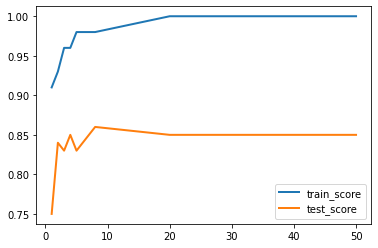

In [0]:
z = [1, 2, 3, 4, 5, 8, 20, 50]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
print('The training results are :')
print(classification_report(y_train, train_predictions))
print('The testing results are :')
print(classification_report(y_test, test_predictions))

The training results are :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       1.00      1.00      1.00       138

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

The testing results are :
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       172
           1       0.80      0.12      0.21        34

    accuracy                           0.85       206
   macro avg       0.83      0.56      0.56       206
weighted avg       0.84      0.85      0.80       206



In [0]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, test_predictions)

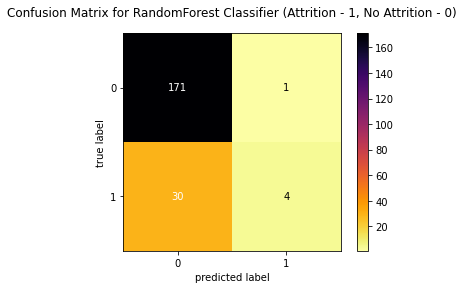

In [0]:
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for RandomForest Classifier (Attrition - 1, No Attrition - 0)')
plt.show()

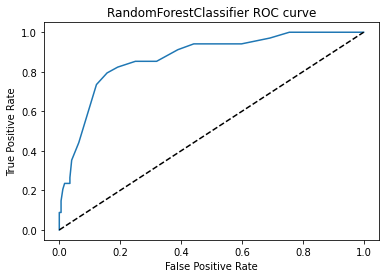

In [0]:
from sklearn.metrics import roc_curve  
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, probs)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.87


## Machine learning model : **Gradient Boosting with XGBoost**


In [0]:
test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:

    #we are changing the number of estimator which is hyperparameter
    xgb_clf = xgb.XGBClassifier(n_estimators=i, learning_rate=0.01)
    xgb_clf.fit(X_train, y_train) # print(rfc)

    train_predictions = xgb_clf.predict(X_train)
    test_predictions = xgb_clf.predict(X_test)


    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))


print("train mean square error :{}".format(mean_absolute_error(y_train,train_predictions)))
print("test mean square error :{}".format(mean_absolute_error(y_test,test_predictions)))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))

print("The testing scores were: {}".format(test_scores))
# plot the loss as well

train mean square error :0.13138686131386862
test mean square error :0.1650485436893204
The training scores were: [0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87]
The testing scores were: [0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83]


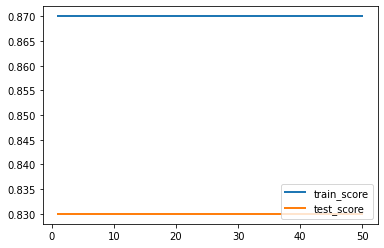

In [0]:
z = [1, 2, 3, 4, 5, 10, 20, 50]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')

In [0]:
print('The training results are :')
print(classification_report(y_train, train_predictions))
print('The testing results are :')
print(classification_report(y_test, test_predictions))

The training results are :
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       684
           1       0.79      0.30      0.43       138

    accuracy                           0.87       822
   macro avg       0.83      0.64      0.68       822
weighted avg       0.86      0.87      0.84       822

The testing results are :
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       172
           1       0.50      0.26      0.35        34

    accuracy                           0.83       206
   macro avg       0.68      0.61      0.63       206
weighted avg       0.81      0.83      0.81       206



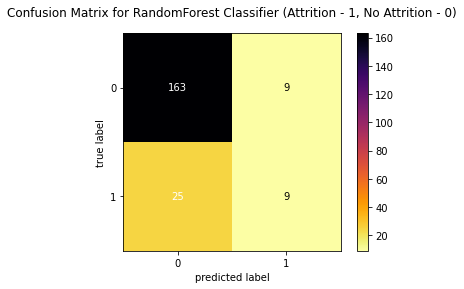

In [0]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for RandomForest Classifier (Attrition - 1, No Attrition - 0)')
plt.show()


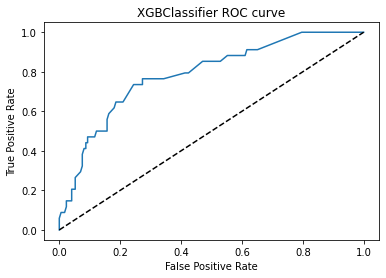

In [0]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBClassifier ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, probs)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.79


## Machine learning model : **DecisionTreeClassifier**

In [0]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train) 

train_predictions = dt.predict(X_train)
test_predictions = dt.predict(X_test)


train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
test_scores.append(round(accuracy_score(y_test, test_predictions), 2))


print("train mean square error :{}".format(mean_absolute_error(y_train,train_predictions)))
print("test mean square error :{}".format(mean_absolute_error(y_test,test_predictions)))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))

print("The testing scores were: {}".format(test_scores))
# plot the loss as well

train mean square error :0.0
test mean square error :0.18932038834951456
The training scores were: [0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 1.0]
The testing scores were: [0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.81]


In [0]:
print('The training results are :')
print(classification_report(y_train, train_predictions))
print('The testing results are :')
print(classification_report(y_test, test_predictions))
#OVERFITTING

The training results are :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       1.00      1.00      1.00       138

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

The testing results are :
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       172
           1       0.44      0.50      0.47        34

    accuracy                           0.81       206
   macro avg       0.67      0.69      0.68       206
weighted avg       0.82      0.81      0.82       206



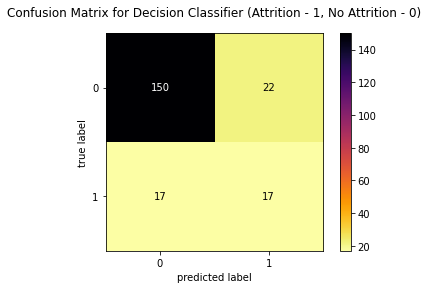

In [0]:
cm = confusion_matrix(y_test, test_predictions)
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for Decision Classifier (Attrition - 1, No Attrition - 0)')
plt.show()

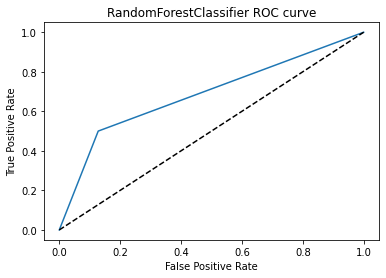

In [0]:
from sklearn.metrics import roc_curve  
probs = dt.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, probs)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.69


`Adaboost classifier` to make the accuracy of the model better.
<br/>
Here we use the base model = `DecisionTree`
<br/>
`Boosting` is used to combine a weak learner classfier into strong learning classifier

In [0]:
test_scores, train_scores = [], []
for i in [100, 200, 300, 400, 500, 600, 700, 800]:

    #we are changing the number of estimator which is hyperparameter
    dt_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy",max_depth=1),n_estimators=i,learning_rate=0.01,algorithm='SAMME')

    dt_boost.fit(X_train, y_train) 

    train_predictions = dt_boost.predict(X_train)
    test_predictions = dt_boost.predict(X_test)


    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))


print("train mean square error :{}".format(mean_absolute_error(y_train,train_predictions)))
print("test mean square error :{}".format(mean_absolute_error(y_test,test_predictions)))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))

print("The testing scores were: {}".format(test_scores))
# plot the loss as well

train mean square error :0.1678832116788321
test mean square error :0.1650485436893204
The training scores were: [0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83]
The testing scores were: [0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83]


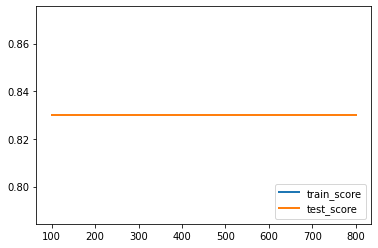

In [0]:
z = [100, 200, 300, 400, 500, 600, 700, 800]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')

In [0]:
print('The training results are :')
print(classification_report(y_train, train_predictions))
print('The testing results are :')
print(classification_report(y_test, test_predictions))

The training results are :
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       684
           1       0.00      0.00      0.00       138

    accuracy                           0.83       822
   macro avg       0.42      0.50      0.45       822
weighted avg       0.69      0.83      0.76       822

The testing results are :
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       172
           1       0.00      0.00      0.00        34

    accuracy                           0.83       206
   macro avg       0.42      0.50      0.46       206
weighted avg       0.70      0.83      0.76       206



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


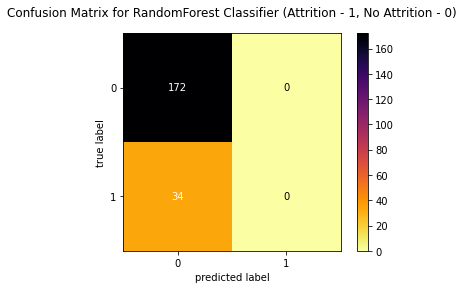

In [0]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
fig, ax = plot_confusion_matrix(conf_mat=cm,cmap='inferno_r',colorbar=True)
plt.title('Confusion Matrix for RandomForest Classifier (Attrition - 1, No Attrition - 0)')
plt.show()

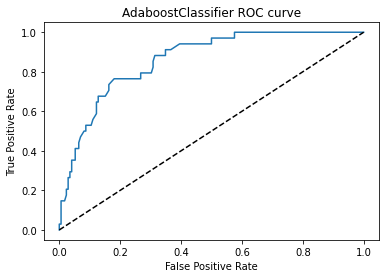

In [0]:
from sklearn.metrics import roc_curve  
probs = dt_boost.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaboostClassifier ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, probs)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.86


### **DECISION TREE CLASSIFICATION WITH GRID SEARCH**

In [0]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [0]:
grid_search.fit(X_train, y_train)
print('The training results are :')
print(classification_report(y_train, grid_search.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, grid_search.predict(X_test)))

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The training results are :
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       684
           1       0.74      0.37      0.49       138

    accuracy                           0.87       822
   macro avg       0.81      0.67      0.71       822
weighted avg       0.86      0.87      0.85       822

The testing results are :
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       172
           1       0.52      0.32      0.40        34

    accuracy                           0.84       206
   macro avg       0.70      0.63      0.65       206
weighted avg       0.82      0.84      0.82       206



[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    7.6s finished


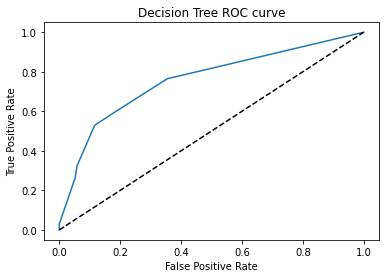

In [0]:
probs = grid_search.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, probs)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.76


In [0]:
grid_search.best_params_, grid_search.best_score_

({'max_leaf_nodes': 8, 'min_samples_split': 2}, 0.8357664233576642)

In [0]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')